# Importing libraries

We have chosen to use the PyTorch library to build our DCGAN model 

In [1]:
import os 

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as dset
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import numpy as np

## "Hyperparameters to "change" the whole model 

In [14]:
# input definitions
dataroot = "./Data/monet_jpg/"

# Our original picture size is 256x256
image_size = 64

batch_size= 1

ngpu = 1

latent_size = 100

feature_maps_size = 64

# Number of channels in the training images. For color images this is 3
channels = 3

# Change the normalization of the real input images.



## Code notes

**https://www.kaggle.com/code/ninamaamary/dcgan-artist** : DCGAN example from Kaggle.

**path_list = os.listdir(img_dir) :** Creates a list with all the file names in the dictionary. \
**abspath = os.path.abspath(img_dir) :** creates a list with all the complete paths, so all these small files names joined with the root path. Such that each picture now has its unique path in the list. 

**transforms.Normalize() :** Normalize range of R, B and G. ([mean], [std]). Helps CNN to peform better. Have this match with the generator, such that we create pictures in the same range of colors

**ToTensor() :** Takes the image and converts it to the pytorch own picture format. 

**The transform.Compose "function" :** It changes the image to a PyTorch format, and is able to "change" the picture in certain ways. 


## Questions... ? (we are confused)

- Why do we need a batchsize in the Dataloader?
- Why do we shuffle in the Dataloader? 


In [15]:
#import dataset 
class Dataset(Dataset):
    
    def __init__(self, img_dir):
        path_list = os.listdir(img_dir)
        abspath = os.path.abspath(img_dir)

        self.img_list = [os.path.join(abspath, path) for path in path_list]

        self.transform = transforms.Compose([
            transforms.Resize(image_size),
            # transforms.CenterCrop(image_size), # Crops the image, doesn't make sense to use. 
            transforms.ToTensor(),
            # transforms.Normalize([1, 0.5, 10], [1, 0.5, 10]), # Makes the picture green. 
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
            # transforms.Normalize([1, 1, 1], [1, 1, 1]),
            ############################### Normalize range of R, B and G. ([mean], [std]). Helps CNN to peform better. 
        ])


    def __len__(self):
        return len(self.img_list)


    def __getitem__(self, index):
        path = self.img_list[index]
        img = Image.open(path).convert('RGB')
        return self.transform(img)

In [16]:
monet_dataset = Dataset(dataroot)

data_loader = DataLoader(monet_dataset, batch_size=batch_size, shuffle=True)

In [17]:
# Get an example of what a picture looks like, note that there is our 3 layers of color.
print(monet_dataset[0])

tensor([[[ 0.4902,  0.5529,  0.5686,  ...,  0.7804,  0.7804,  0.7098],
         [ 0.5137,  0.5765,  0.5137,  ...,  0.8039,  0.7961,  0.7569],
         [ 0.5216,  0.5765,  0.5294,  ...,  0.8118,  0.8039,  0.7961],
         ...,
         [ 0.6392,  0.5922,  0.5451,  ..., -0.1294,  0.0667,  0.0118],
         [ 0.4902,  0.4980,  0.4510,  ..., -0.0667,  0.0510,  0.0431],
         [ 0.4588,  0.4118,  0.3882,  ..., -0.0118,  0.0353,  0.0667]],

        [[ 0.4980,  0.5843,  0.6235,  ...,  0.7333,  0.7176,  0.6157],
         [ 0.5686,  0.6549,  0.6078,  ...,  0.7412,  0.7255,  0.6549],
         [ 0.6471,  0.7020,  0.6627,  ...,  0.7412,  0.7255,  0.6863],
         ...,
         [ 0.3569,  0.3804,  0.3882,  ..., -0.4588, -0.3490, -0.5373],
         [ 0.3412,  0.4353,  0.4902,  ..., -0.4039, -0.4196, -0.5922],
         [ 0.3647,  0.4275,  0.5059,  ..., -0.1686, -0.2627, -0.4039]],

        [[ 0.3176,  0.4745,  0.5686,  ...,  0.6471,  0.6078,  0.4275],
         [ 0.5373,  0.6549,  0.6078,  ...,  0

## Plotting an image, just for fun.

Code is directly taken from: 
https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

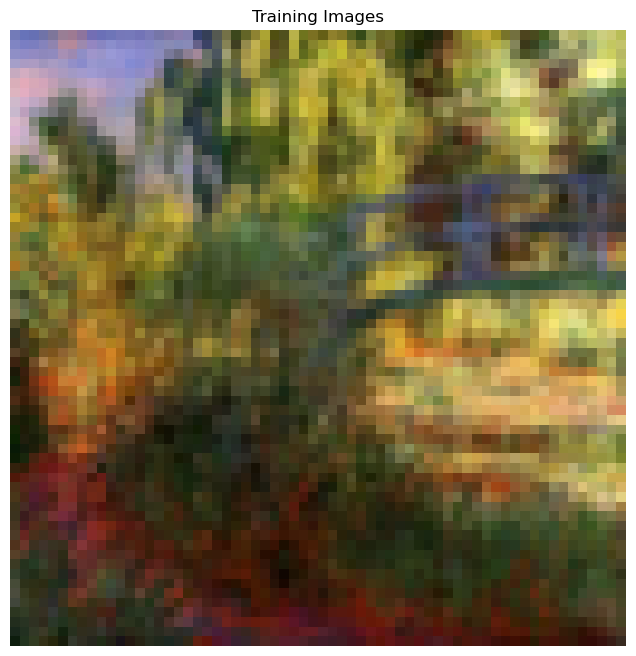

In [18]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

real_batch = next(iter(data_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

#### ConvTranspose2d( in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros', device=None, dtype=None

- in_channels (number of channels in the input image), 
- out_channels (number of channels produced by the convolution), 
- kernel_size (size of the convolving kernel), 
- stride=1 (stride of the convolution. Default: 1), 
- padding=0 (dilation * (kernel_size - 1) - padding zero-padding will be added to both sides of each dimension in the input. Default: 0), 
- output_padding=0 (Additional size added to one side of each dimension in the output shape. Default: 0), 
- groups=1 (Number of blocked connections from input channels to output channels. Default: 1), 
- bias=True (If True, adds a learnable bias to the output.), 
- dilation=1 (Spacing between kernel elements. Default: 1), 
- padding_mode='zeros', 
- device=None, 
- dtype=None)

#### Lidt om ReLu
ReLU is the most commonly used activation function in neural networks, especially in CNNs. If you are unsure what activation function to use in your network, ReLU is usually a good first choice. It obviously has some advantages, for example making computations more simple and thus cheap, converges faster as it does not obviously suffer from the problems typical e. g. for tanh or sigmoid such as vanishing or exploding gradients…So, it’s almost perfect , except sometimes you may face a “dying ReLU” problem, as the neurons can become dead forever if they are stuck in the negative side, always outputting “0”. 

In [22]:
#generator class
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( in_channels=latent_size, out_channels=feature_maps_size * 8, kernel_size=4, stride=1, padding=0, bias=False), 
            nn.BatchNorm2d(feature_maps_size * 8), # Applies Batch Normalization over a 4D input (a mini-batch of 2D inputs with additional channel dimension)
            nn.ReLU(True), #output the input directly if it is positive, otherwise, it will output zero. 
            # state size. ``(feature_maps_size*8) x 4 x 4``
            nn.ConvTranspose2d(feature_maps_size * 8, feature_maps_size * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_maps_size * 4),
            nn.ReLU(True),
            # state size. ``(feature_maps_size*4) x 8 x 8``
            nn.ConvTranspose2d( feature_maps_size * 4, feature_maps_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_maps_size * 2),
            nn.ReLU(True),
            # state size. ``(feature_maps_size*2) x 16 x 16``
            nn.ConvTranspose2d( feature_maps_size * 2, feature_maps_size, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_maps_size),
            nn.ReLU(True),
            # state size. ``(feature_maps_size) x 32 x 32``
            nn.ConvTranspose2d( feature_maps_size, channels, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(channels) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)

In [23]:
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [24]:
netG = Generator(ngpu).to(device)


# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [ ]:
#discriminator class
class Discriminator(nn.Module):
    #ting sker her
    
    pass

In [ ]:
#results